<h1 style="color:tomato"><center>★ Used Car Price Prediction ★</center></h1>

<h1 style="color:#88bddb">Content</h1>

- 1.<a href="#1">Overview</a>
- 2.<a href="#2">Importing librarires</a>
- 3.<a href="#3">Load Dataset</a>
- 4.<a href="#4">Data Understanding</a>
- 5.<a href="#5">Data-Preprocessing</a>
- 6.<a href="#6">Data Prepartion</a>
- 7.<a href="#7">Modelling</a>

<a id="1"></a>
## 1. Overview

In this notebook, a customized Linear Regression model, which uses Gradient Descent method for optimization, is built and trained. Then, this model is put in comparison with an another Linear Regression model built via scikit-learn library (which uses Normal Equation method for optimization), and further comparing with several other Regression models (such as Decision Tree and Random Forest).

<a id="2"></a>
## 2. Importing the librarires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

rcParams['figure.figsize'] = 12, 7

<a id="3"></a>
## 3.Load_Dataset

In [2]:
car_price_df = pd.read_csv('true_car_listings.csv')
car_price_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


<a id="4"></a>
## 4.Data Understanding

In [3]:
car_price_df.shape

(852122, 8)

In [4]:
car_price_df.describe(include="all")

,Price,Year,Mileage,City,State,Vin,Make,Model
count,852122.000000,852122.000000,8.521220e+05,852122,852122,852122,852122,852122
unique,NaN,NaN,NaN,2553,59,852075,58,2736
top,NaN,NaN,NaN,Houston,TX,2G1FA1E37E9293949,Ford,Silverado
freq,NaN,NaN,NaN,12703,94654,2,110432,24932
mean,21464.100210,2013.289145,5.250779e+04,NaN,NaN,NaN,NaN,NaN
std,13596.202241,3.414987,4.198896e+04,NaN,NaN,NaN,NaN,NaN
min,1500.000000,1997.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,13000.000000,2012.000000,2.383600e+04,NaN,NaN,NaN,NaN,NaN
50%,18500.000000,2014.000000,4.025600e+04,NaN,NaN,NaN,NaN,NaN
75%,26995.000000,2016.000000,7.218600e+04,NaN,NaN,NaN,NaN,NaN


In [5]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [6]:
car_price_df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [7]:
list(car_price_df)

['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model']

<a id="5"></a>
## 5. Data Preprocessing and Visualization

### Categorical encoding for categorical features:

In [8]:
categorical_features = ['City', 'State', 'Vin', 'Make', 'Model']

for feature in categorical_features:
    raw_feature_data = car_price_df[feature]
    encoded_feature_data = LabelEncoder().fit_transform(raw_feature_data)
    car_price_df[feature] = encoded_feature_data

In [9]:
# Verify data after encoding
car_price_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,646,49,3972,1,1194
1,10888,2013,19606,1260,39,3707,1,1193
2,8995,2013,48851,646,49,3970,1,1194
3,10999,2014,39922,2490,6,3824,1,1193
4,14799,2016,22142,1231,50,42,1,1196


In [10]:
# Verify features' datatypes after encoding
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Price    852122 non-null  int64
 1   Year     852122 non-null  int64
 2   Mileage  852122 non-null  int64
 3   City     852122 non-null  int32
 4   State    852122 non-null  int32
 5   Vin      852122 non-null  int32
 6   Make     852122 non-null  int32
 7   Model    852122 non-null  int32
dtypes: int32(5), int64(3)
memory usage: 35.8 MB


<AxesSubplot:>

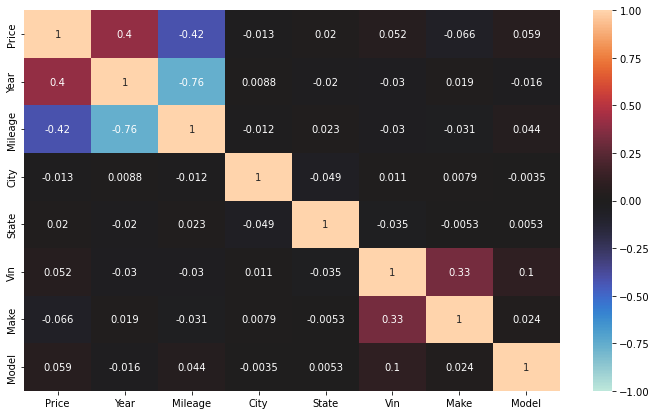

In [11]:
# Visualize correlations between attributes
features_correlation = car_price_df.corr()
sns.heatmap(features_correlation, annot=True, vmin=-1, vmax=1, center=0)

**This correlation plot depicts that, only "Year" and "Mileage" features are two most correlated features with the target variable. Therefore, only those features would be selected for preparation**

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

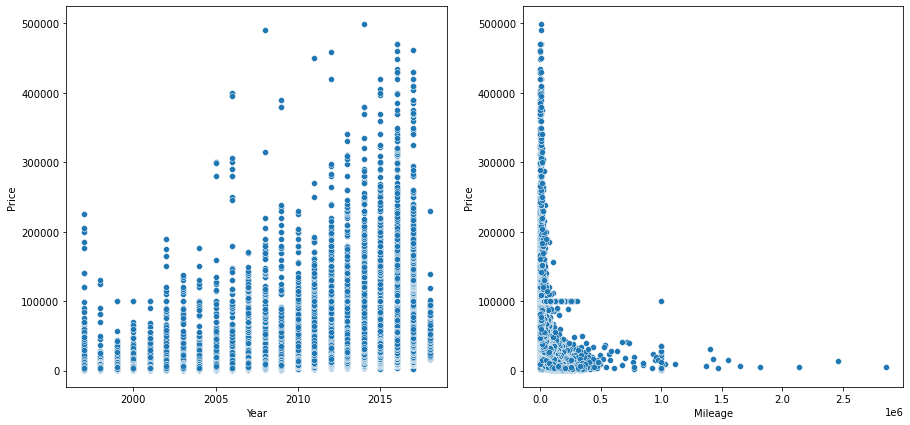

In [12]:
# Make scatterplots with data in "Year", "Mileage" and "Price" columns
# to show the correlation of each feature with the target variable
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(x='Year', y='Price', data=car_price_df, ax=axes[0])
sns.scatterplot(x='Mileage', y='Price', data=car_price_df, ax=axes[1])

<a id="6"></a>
## 6.Data Prepartion or Train_Test_split

In [13]:
X = car_price_df[['Year', 'Mileage']].values
y = car_price_df['Price'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=25)

In [15]:
normalizer = StandardScaler().fit(X_train)

<a id="7"></a>
## 7.Modelling

Information about Linear Regression model & Gradient Descent method:

* Hypothesis function: $h_\theta(x)=\theta^TX$, $X=[1,x_1,x_2,...,x_n]^T$, $\theta=[\theta_0,\theta_1,\theta_2,...\theta_n]^T$

* Cost function: $J=\frac{1}{2m}\sum_{i=1}^m(\theta^TX^{(i)}-y^{(i)})^2$
* Backpropagation: $\frac{\partial J}{\partial \theta_a}=\frac{1}{m}\sum_{i=1}^m(\theta^TX^{(i)}-y{(i)})x_a^{(i)}$, $a=0,1,2,...,n$
* Gradient Descent: $\theta_a=\theta_a-\alpha\frac{\partial J}{\partial \theta_a}$, $a=0,1,2,...,n$

In [16]:
class GDLinearRegression:
    def __init__(self, learning_rate=0.1, epsilon=1e-7):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
    
    def set_learning_rate(self, new_learning_rate):
        self.learning_rate = new_learning_rate
    
    def _initialize_params_n_gradients(self, num_params):
        self.theta = np.zeros((num_params,))
        self.gradients = np.zeros((num_params,))
    
    def _get_cost(self):
        y_hat = np.dot(self.X, self.theta)
        cost = 1/2 * np.mean((y_hat-self.y)**2)
        return cost
    
    def _backpropagation(self):
        y_hat = np.dot(self.X, self.theta)
        for i in range(len(self.gradients)):
            self.gradients[i] = np.mean((y_hat - self.y) * self.X[:, i])
    
    def _update_params(self):
        self.theta -= self.learning_rate * self.gradients
    
    def fit(self, X, y):
        # Initialize X, y
        num_data_points = X.shape[0]
        num_features = X.shape[1]
        self.X = np.c_[np.ones((num_data_points, 1)), X]
        self.y = y
        num_params = num_features + 1
        prev_cost = 0
        iteration = 1
        # Initialize parameters theta, and gradients
        self._initialize_params_n_gradients(num_params)
        while True:
            # Compute cost
            cost = self._get_cost()
            # Calculate gradients
            self._backpropagation()
            # Update parameters
            self._update_params()
            # Loop until cost difference below epsilon value
            if np.abs(cost - prev_cost) < self.epsilon:
                break
            prev_cost = cost
            iteration += 1
        # Return the model
        return self
    
    def predict(self, X):
        num_data_points = X.shape[0]
        X_b = np.c_[np.ones((num_data_points, 1)), X]
        return np.dot(X_b, self.theta)

### Train The Model

In [17]:
gd_lr = Pipeline([('scaler', normalizer),
                  ('GDLR', GDLinearRegression())])
gd_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GDLR',
                 <__main__.GDLinearRegression object at 0x0000015454EBE0A0>)])

<a id="9"></a>
## Evaluate

In the evaluation phase, RMSE metric is used. RMSE stands for Root Mean Squared Error, is the squared-root value of, the mean of differences between actual values and predictions.

The formula of RMSE:

$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^m(y^{(i)}-\hat{y}^{(i)})^2}$

In [18]:
y_pred_gd = gd_lr.predict(X_test)
print("RMSE: %.5f" % mean_squared_error(y_test, y_pred_gd, squared=False))

RMSE: 11622.82243


In [19]:
# Display model's parameters
print('Bias:', gd_lr['GDLR'].theta[0])
print('Weights:', gd_lr['GDLR'].theta[1:])

Bias: 21464.48111254084
Weights: [ 2588.21024046 -3751.84658925]


** Above We Built the GDLR from the strach **

<h2 style="color:green"> Compare with Linear Regression model built via scikit-learn library (which uses Normal Equation method)</h2>

## Train The Model

In [20]:
ne_lr = Pipeline([('scaler', normalizer),
                  ('NELR', LinearRegression())])
ne_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('NELR', LinearRegression())])

## Evaluate Model

In [21]:
y_pred_ne = ne_lr.predict(X_test)
print('RMSE: %.5f' % mean_squared_error(y_test, y_pred_ne, squared=False))

RMSE: 11622.82247


In [22]:
# Display model's parameters
print('Bias:', ne_lr['NELR'].intercept_)
print('Weights:', ne_lr['NELR'].coef_)

Bias: 21464.481112540874
Weights: [ 2588.20736312 -3751.84946659]


<h2 style="color:borwn"> Comparison summary</h2>

### Performance comparison:

| Model | RMSE |
| :---: | :---: |
| Gradient Descent based Linear Regression | 11622.822 |
| Normal Equation based Linear Regression | 11622.822 |

### Parameters comparison:

| Model | $\theta_0$ | $\theta_1$ | $\theta_2$ |
| :---: | :---: | :---: | :---: |
| Gradient Descent based Linear Regression | 21464.481 | 2588.21 | -3751.847 |
| Normal Equation based Linear Regression | 21464.481 | 2588.207 | -3751.849 |

**These tables indicate that performances of two models are almost the same. Although there are several differences about RMSE or several parameters between them, these differences are very small.**

<h2 style="color:green">BONUS: Compare with several other Regression models (Decision Tree, Random Forest)</h2>

**Import class models**

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Train Models**

In [24]:
# Decision Tree
dtr = Pipeline([('scaler', normalizer),
                ('Decision Tree', DecisionTreeRegressor(random_state=25))])
dtr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeRegressor(random_state=25))])

In [25]:
# Random Forest
rfr = Pipeline([('scaler', normalizer),
                ('Random Forest', RandomForestRegressor(random_state=20))])
rfr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestRegressor(random_state=20))])

**Evaluate**

In [26]:
# Decision Tree
y_pred_dt = dtr.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred_dt, squared=False))

RMSE: 14294.230405454233


In [27]:
# Random Forest
y_pred_rf = rfr.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred_rf, squared=False))

RMSE: 13043.905422626149


<h3 style="color:borwn"> Comparison summary</h3>

### Performance comparison:

| Model | RMSE |
| :---: | :---: |
| Gradient Descent based Linear Regression | 11622.822 |
| Normal Equation based Linear Regression | 11622.822 |
| Decision Tree | 14294.23 |
| Random Forest | 13043.905 |

**Tree-based models have worse performances than Linear Regression models.**